In [1]:
from urllib import urlretrieve
urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", "iris.csv")

('iris.csv', <httplib.HTTPMessage instance at 0x00000000088251C8>)

In [186]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [187]:
iris = pd.read_csv("iris.csv", names=["sepal-length","sepal-width","petal-length","petal-width","class"])

x = np.array(iris.iloc[:,:-1])
y = np.array(iris.iloc[:,-1])

data = {'x':x[:,0],'y':x[:,1], 'label':y}
df = pd.DataFrame(data=data)
df.head()

,label,x,y
0,Iris-setosa,5.1,3.5
1,Iris-setosa,4.9,3.0
2,Iris-setosa,4.7,3.2
3,Iris-setosa,4.6,3.1
4,Iris-setosa,5.0,3.6


Text(0.5,1,u'Thong ITITIU15001')

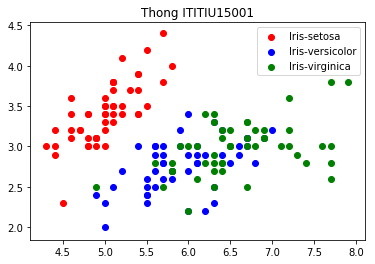

In [180]:
colors = {'Iris-setosa':'red','Iris-versicolor':'blue','Iris-virginica':'green'}
for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(x[ix,0], x[ix,1], c = colors[g], label = g)
plt.legend()
plt.title("Thong ITITIU15001")

Text(0.5,1,u'Thong ITITIU15001')

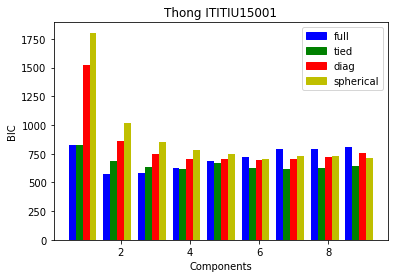

In [194]:
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.patches as mpatches

for i in range(1,10):
    gmm = GMM(n_components=i, covariance_type='full').fit(x)
    plt.bar(i - 0.4, gmm.bic(x), color = 'b', width = 0.2)
    gmm = GMM(n_components=i, covariance_type='tied').fit(x)
    plt.bar(i - 0.2, gmm.bic(x), color = 'g', width = 0.2)
    gmm = GMM(n_components=i, covariance_type='diag').fit(x)
    plt.bar(i + 0.0, gmm.bic(x), color = 'r', width = 0.2)
    gmm = GMM(n_components=i, covariance_type='spherical').fit(x)
    plt.bar(i + 0.2, gmm.bic(x), color = 'y', width = 0.2)
    
plt.legend(handles=[mpatches.Patch(color=a, label=b) for (a,b) in zip(['b','g','r','y'],['full','tied','diag','spherical'])])
plt.xlabel("Components")
plt.ylabel("BIC")
plt.title("Thong ITITIU15001")

Text(0.5,1,u'Thong ITITIU15001')

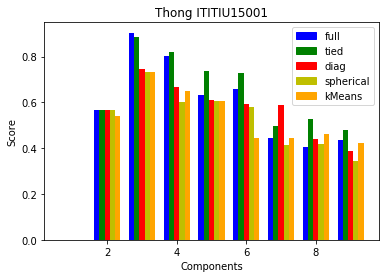

In [200]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

for i in range(1,10):
    gmm = GMM(n_components=i, covariance_type='full').fit(x)
    plt.bar(i - 0.3, adjusted_rand_score(y, gmm.predict(x)), color = 'b', width = 0.15)
    gmm = GMM(n_components=i, covariance_type='tied').fit(x)
    plt.bar(i - 0.15, adjusted_rand_score(y, gmm.predict(x)), color = 'g', width = 0.15)
    gmm = GMM(n_components=i, covariance_type='diag').fit(x)
    plt.bar(i + 0.0, adjusted_rand_score(y, gmm.predict(x)), color = 'r', width = 0.15)
    gmm = GMM(n_components=i, covariance_type='spherical').fit(x)
    plt.bar(i + 0.15, adjusted_rand_score(y, gmm.predict(x)), color = 'y', width = 0.15)
    kmeans = KMeans(n_clusters=i, random_state=42).fit(x)
    plt.bar(i + 0.3, adjusted_rand_score(y, kmeans.predict(x)), color = 'orange', width = 0.15)
    
plt.legend(handles=[mpatches.Patch(color=a, label=b) for (a,b) in zip(['b','g','r','y','orange'],['full','tied','diag','spherical','kMeans'])])
plt.xlabel("Components")
plt.ylabel("Score")
plt.title("Thong ITITIU15001")